### Google.colab
Only execute this cell when use on google colab platform (colab).

<table class="tfo-notebook-buttons" align="left">
  <td>
    <a target="_blank" href="http://github.com/Nak007/charts"><img src="https://www.tensorflow.org/images/GitHub-Mark-32px.png" />View source on GitHub</a>
  </td>
</table>

In [ ]:
# Mount with google drive.
from google.colab import drive
drive.mount('/content/dirve')

# Import other libraries required.
# All *.py will be stored under the following 
# location i.e. '/content/charts'.
!git clone 'http://github.com/Nak007/charts.git'

In [1]:
# Import libraries.
import pandas as pd, numpy as np
from pandas import Timestamp
from ipywidgets import interact, fixed
from Gantt_plot import *

pd.options.display.float_format = '{:,.3f}'.format

## Examples

In [2]:
df = pd.read_excel('work_schedule.xlsm', sheet_name="Schedule").drop(columns=["start_date","days"])
df[["start", "end"]] = df[["start", "end"]].apply(pd.to_datetime)
df.sample(5)

,type,task,description,deliverables,completion,start,end,member1,member2,member3
6,Project,Task I,aaa,bbb,0.400,2022-02-28,2022-03-05,1,0,1
4,Project,Task J,aaa,bbb,0.000,2022-03-04,2022-03-17,1,0,0
11,Project,Task C,aaa,bbb,0.600,2022-02-21,2022-03-03,1,1,0
12,Project,Task B,aaa,bbb,1.000,2022-02-18,2022-02-23,0,0,1
3,Project,Task K,aaa,bbb,0.000,2022-03-09,2022-03-15,1,0,0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16 entries, 0 to 15
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   type          16 non-null     object        
 1   task          16 non-null     object        
 2   description   16 non-null     object        
 3   deliverables  16 non-null     object        
 4   completion    16 non-null     float64       
 5   start         16 non-null     datetime64[ns]
 6   end           16 non-null     datetime64[ns]
 7   member1       16 non-null     int64         
 8   member2       16 non-null     int64         
 9   member3       16 non-null     int64         
dtypes: datetime64[ns](2), float64(1), int64(3), object(4)
memory usage: 1.4+ KB


In [4]:
ref_date = Timestamp(2022,3,1)

In [5]:
holidays = pd.read_excel('work_schedule.xlsm', sheet_name="PublicHolidays").drop(columns=["Holiday"])
holidays = np.array(holidays, dtype="datetime64[D]").ravel()

In [6]:
X = create_schedule(df.copy(), ref_date)
X = X.sort_values(by="start",ascending=False).reset_index(drop=True)
X.head(5)

,type,task,description,deliverables,completion,start,end,member1,member2,member3,start_num,end_num,duration,busday,prog_day,exp_day,plan,diff_pct,diff_day,status
0,Project,Task M,aaa,bbb,0.000,2022-03-17,2022-03-19,0,0,1,30,32,2,2,0.000,0,0.000,0.000,0.000,on-time
1,Project,Task N,aaa,bbb,0.000,2022-03-16,2022-03-19,1,1,1,29,32,3,3,0.000,0,0.000,0.000,0.000,on-time
2,Project,Task L,aaa,bbb,0.000,2022-03-10,2022-03-15,0,1,0,23,28,5,3,0.000,0,0.000,0.000,0.000,on-time
3,Project,Task K,aaa,bbb,0.000,2022-03-09,2022-03-15,1,0,0,22,28,6,4,0.000,0,0.000,0.000,0.000,on-time
4,Routine,Event (1),aaa,bbb,0.000,2022-03-09,2022-03-09,1,1,0,22,22,0,0,0.000,0,0.000,0.000,0.000,event


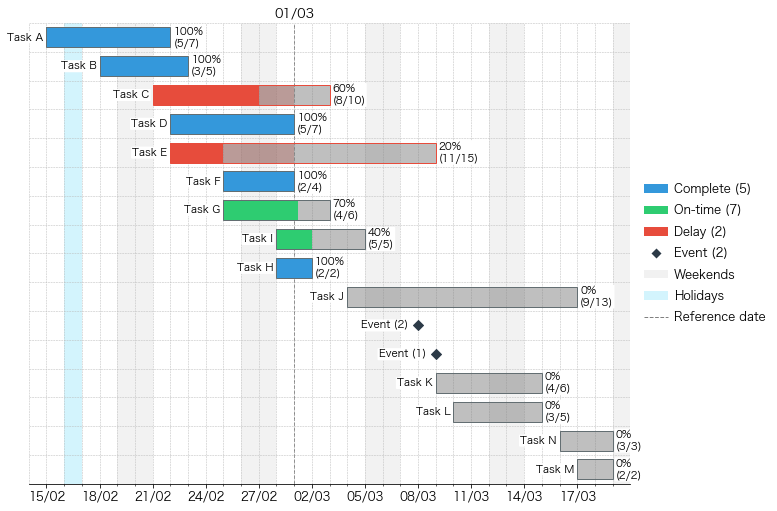

In [7]:
ax = gantt_plot(X, ref_date=ref_date, holidays=holidays, show_delta=False)

In [8]:
def interactive_gantt(df, ref_date, intv_day, holidays, show_delta):
    X = create_schedule(df.copy(), ref_date)
    X = X.sort_values(by="start",ascending=False).reset_index(drop=True)
    colors = ["#1B9CFC","#55E6C1","#FC427B","#82589F","#FEA47F"]
    ax = gantt_plot(X, ref_date=ref_date, holidays=holidays,
                    intv_day=intv_day, show_delta=show_delta, colors=colors)

In [9]:
kwargs = dict(df=fixed(df), intv_day = [3,4,5,6,7],
              ref_date=workingdays("2022-02-15", "2022-03-20"), 
              show_delta=[False, True], holidays=fixed(holidays))
ax = interact(interactive_gantt, **kwargs)

interactive(children=(Dropdown(description='ref_date', options=(numpy.datetime64('2022-02-15'), numpy.datetime…